In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

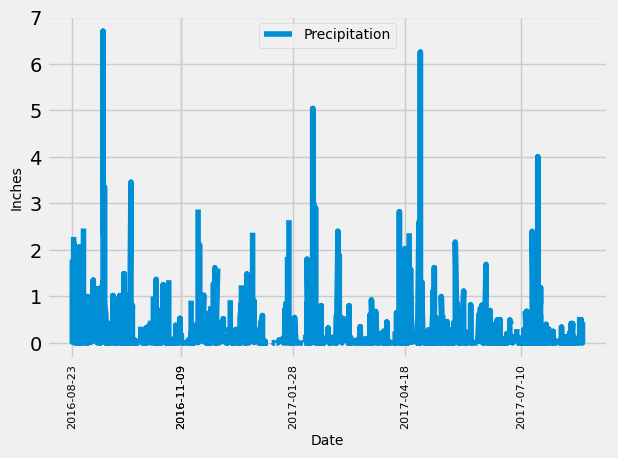

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_data = datetime.strptime('2017-08-23', '%Y-%m-%d')
# Calculate the date one year from the last date in data set.

one_year_date = recent_data - dt.timedelta(days=366)


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date
sorted_precipitation_df = precipitation_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sorted_precipitation_df.index, sorted_precipitation_df['Precipitation'])

# Setting x-axis parameters
xloc = ['2016-08-23', '2016-11-09', '2016-11-09', '2017-01-28', '2017-04-18','2017-07-10'] 
plt.xticks(xloc, rotation= 90,fontsize=8)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Inches',fontsize=10)
plt.legend(['Precipitation'], loc = 'upper center', fontsize=10)
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_stats = precipitation_df['Precipitation'].describe()
prcp_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
act_station = [station.station, func.count(measurement.station)]
mas_query = session.query(*act_station).\
    filter(station.station == measurement.station).\
    group_by(station.station).\
    order_by(func.count(measurement.station).desc()).all()
mas_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = [measurement.station,
         func.min(measurement.tobs),
         func.max(measurement.tobs),
         func.avg(measurement.tobs)]
most_active_temps = session.query(*temps).\
        filter(measurement.station == 'USC00519281').all()

most_active_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

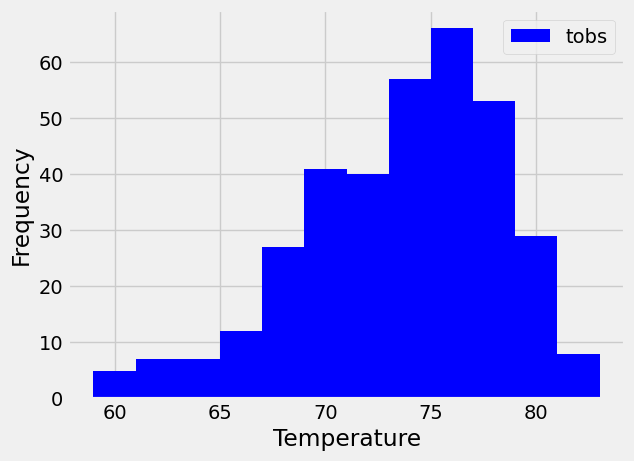

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_data = session.query(measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date >= one_year_date).all()
df = pd.DataFrame(most_active_temp_data, columns=['Temperature'])
df.to_csv('temp_output.csv', index=False)
plt.hist(df['Temperature'], bins=12, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show


# Close Session

In [16]:
# Close Session
session.close()